Piotr Suchy 407332

## <center> Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1038]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [1039]:
df = pd.read_csv('data.csv', delimiter=',')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [1040]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

# sprawdzam dane tekstowe:
categorical_str = df.select_dtypes(include="object")
str_cols_names = categorical_str.columns

# print'uje tylko nazwy kolumn
print('Dane tektowe zawierają kolumny :\n\n', categorical_str)
print(str_cols_names)

Dane tektowe zawierają kolumny :

                workclass    education       marital_status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native_country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   Uni

Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [1041]:
df[str_cols_names].head(20)
print(df.shape)
print(df[str_cols_names].head(20))

(32561, 15)
            workclass      education          marital_status  \
0           State-gov      Bachelors           Never-married   
1    Self-emp-not-inc      Bachelors      Married-civ-spouse   
2             Private        HS-grad                Divorced   
3             Private           11th      Married-civ-spouse   
4             Private      Bachelors      Married-civ-spouse   
5             Private        Masters      Married-civ-spouse   
6             Private            9th   Married-spouse-absent   
7    Self-emp-not-inc        HS-grad      Married-civ-spouse   
8             Private        Masters           Never-married   
9             Private      Bachelors      Married-civ-spouse   
10            Private   Some-college      Married-civ-spouse   
11          State-gov      Bachelors      Married-civ-spouse   
12            Private      Bachelors           Never-married   
13            Private     Assoc-acdm           Never-married   
14            Private      A

In [1042]:
# Exploring if there are any problems within the categorical variables:
# check missing values in categorical variables
print(df[str_cols_names].isnull().sum())

# view frequency counts of values in categorical variables
for var in str_cols_names:
    print(df[var].value_counts())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed

Rozwijając output w całości, możemy zauważyć, że w 'workclass', 'occupation' i 'native_country' znajdują się wartości '?' - czyli missing values, które trzeba usunąć.

In [1043]:
# for col_name in ['workclass', 'occupation', 'native_country']:
#     df[col_name].replace({'?': np.NaN}, inplace=True)

df[str_cols_names].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [1044]:
df['native_country'] = df['native_country'].replace(' ?', np.NaN)
df['occupation'] = df['occupation'].replace(' ?', np.NaN)
df['workclass'] = df['workclass'].replace(' ?', np.NaN)

print(df[str_cols_names].isnull().sum())

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64


In [1045]:
# Liczbowe:
df_num = df.select_dtypes(include='number')
num_cols_names = df_num.columns
df_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


## INCOME:

In [1046]:
# Deklaracja feature wektora i zmienna niezależna:
X = df.drop(['income'], axis = 1)
y = df['income']

# Stworzenie zbiorów uczących i testowych:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape


((22792, 14), (9769, 14))

In [1047]:
X_train.dtypes

# Feature engineering:
str_col_name = str_cols_names[0:-1]
print(str_col_name.to_numpy())
print(num_cols_names.to_numpy())

# wypisuje procent brakujących wartości w zmiennych tekst. w X_train
print(X_train[str_col_name].isnull().mean()) 

['workclass' 'education' 'marital_status' 'occupation' 'relationship'
 'race' 'sex' 'native_country']
['age' 'fnlwgt' 'education_num' 'capital_gain' 'capital_loss'
 'hours_per_week']
workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64


In [1048]:
# wypisuje tylko te które są != 0:
for col in str_col_name:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [1049]:
# w nowym dataframe'ie używamy fillna() aby wypełnić brakujące wartości tymi, które występują najczęściej:
# używając funkcji mode() i biorąc 1szy indeks z jej wyniku daje wartość, która wystąpiła najwięcej razy.
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  

In [1050]:
# Aby model mógł być poprawny, musimy sprawdzić, czy po wszystkich zmianach są jeszcze jakieś brakujące wartości:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


Widzimy, że dla wszystkich zmiennych jest 0 brakujących wartości, więc możemy przystąpić do następnego etapu.

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [1051]:
encoder = ce.OneHotEncoder(cols = str_col_name)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# print(X_train.head())
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [1052]:
# Następnym etapem jest przeskalowanie zmiennych aby następnie zbudować z nich model - feature scaling:
x_tr_cols = X_train.columns
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[x_tr_cols])
X_test = pd.DataFrame(X_test, columns=[x_tr_cols])

# X_train.head()
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.253496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [1053]:
# stworzenie modelu GaussianNB()
gnb = GaussianNB()

# dopasowanie do niego wartości ze zbioru treningowego
gnb = gnb.fit(X_train, y_train)

# wyznaczenie predykcji na podstawie modelu:
y_pred = gnb.predict(X_test)

# wyprintowanie kształtu predykcji - 9769 predykcji, jedna dla każdego wiersza
print(y_pred.shape)
print(y_pred)

(9769,)
[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' <=50K']


/Users/piotrsuchy/Desktop/Programming/anaconda/anaconda3/envs/piotrsuchy/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/piotrsuchy/Desktop/Programming/anaconda/anaconda3/envs/piotrsuchy/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [1054]:
print('Dokładność modelu to: {0:0.5f}'.format(accuracy_score(y_test, y_pred)),'\n')

cm = confusion_matrix(y_test, y_pred)

print('Macierz Błędu: \n\n', cm)

print('\nTrue Positives - TP = ', cm[0,0],'\n')

print('True Negatives - TN = ', cm[1,1],'\n')

print('False Positives - FP = ', cm[0,1],'\n')

print('False Negatives - FN = ', cm[1,0],'\n')

Dokładność modelu to: 0.80827 

Macierz Błędu: 

 [[5999 1408]
 [ 465 1897]]

True Positives - TP =  5999 

True Negatives - TN =  1897 

False Positives - FP =  1408 

False Negatives - FN =  465 



<AxesSubplot:>

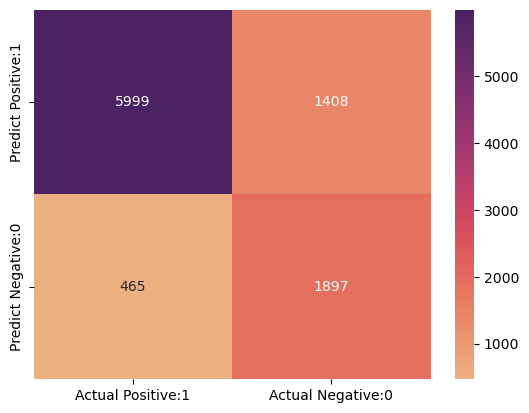

In [1055]:
# Wizualizacja macierzy błędu:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='flare')

Model jest dokładny w około 80%, a macierz błędu jest dosyć zwyczajna - tzn. około 1900 wyników było niepoprawnych (FN i FP) a o prawie 4-krotnie więcej było FP niż FN, co jest spójne ze stosunkiem TP do TN.

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

## RACE:

In [1056]:
# zmienna niezależna - race:
X_race = df.drop(['race'], axis = 1)
y_race = df['race']

# print(X_race)
# print(y_race.mode())

# Stworzenie zbiorów uczących i testowych:
X_race_train, X_race_test, y_race_train, y_race_test = train_test_split(X_race, y_race, test_size=0.3, random_state=0)
X_race_train.shape, X_race_test.shape

((22792, 14), (9769, 14))

In [1057]:
# Feature engineering:
print(str_cols_names)
# drop 'race'
col_no_race = str_cols_names.delete(5)
print(col_no_race.to_numpy())
print(num_cols_names.to_numpy())

# wypisuje procent brakujących wartości w zmiennych tekst. w X_train
print(X_race_train[col_no_race].isnull().mean()) 

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
['workclass' 'education' 'marital_status' 'occupation' 'relationship'
 'sex' 'native_country' 'income']
['age' 'fnlwgt' 'education_num' 'capital_gain' 'capital_loss'
 'hours_per_week']
workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
sex               0.000000
native_country    0.018164
income            0.000000
dtype: float64


In [1058]:
for col in col_no_race:
    if X_race_train[col].isnull().mean()>0:
        print(col, (X_race_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [1059]:
for df3 in [X_race_train, X_race_test]:
    df3['workclass'].fillna(X_race_train['workclass'].mode()[0], inplace=True)
    df3['occupation'].fillna(X_race_train['occupation'].mode()[0], inplace=True)
    df3['native_country'].fillna(X_race_train['native_country'].mode()[0], inplace=True)

In [1060]:
print(X_race_train[col_no_race].isnull().sum(), '\n')
print(X_race_test[col_no_race].isnull().sum())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
sex               0
native_country    0
income            0
dtype: int64 

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
sex               0
native_country    0
income            0
dtype: int64


In [1061]:
print(X_race_train.isnull().sum(),'\n')
print(X_race_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Analogicznie do 1szego przykładu, zastąpiłem brakujące wartości tymi najczęściej występującymi.

In [1062]:
encoder = ce.OneHotEncoder(cols=col_no_race)

X_race_train = encoder.fit_transform(X_race_train)
X_race_test = encoder.transform(X_race_test)

# print(X_race_train.head(3))
X_race_test.head(3)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,1


In [1063]:
# Następnie feature scaling:
cols = X_race_train.columns

scaler = RobustScaler()

X_race_train = scaler.fit_transform(X_race_train)

X_race_test = scaler.transform(X_race_test)
X_race_train = pd.DataFrame(X_race_train, columns=[cols])
X_race_test = pd.DataFrame(X_race_test, columns=[cols])

# X_race_train.head()
X_race_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.253496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0


In [1064]:
# stworzenie i trening modelu
gnb_race = GaussianNB()


# fit the model
gnb_race.fit(X_race_train, y_race_train)

y_race_pred = gnb_race.predict(X_race_test)

y_race_pred

/Users/piotrsuchy/Desktop/Programming/anaconda/anaconda3/envs/piotrsuchy/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/piotrsuchy/Desktop/Programming/anaconda/anaconda3/envs/piotrsuchy/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([' Black', ' White', ' White', ..., ' White', ' White', ' Black'],
      dtype='<U19')

In [1065]:
# Ocena dokładności modelu i wyliczenie macierzy błędu:

print('Dokładność modelu to: {0:0.5f}'.format(accuracy_score(y_race_test, y_race_pred)),'\n')

cm_race = confusion_matrix(y_race_test, y_race_pred)

print('Macierz Błędu: \n\n', cm_race)

Dokładność modelu to: 0.67213 

Macierz Błędu: 

 [[   6    0   27    2   45]
 [   5  163   40    5  105]
 [  20    4  476    7  404]
 [   1    3   14   21   33]
 [ 164   50 2036  238 5900]]


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


<AxesSubplot:>

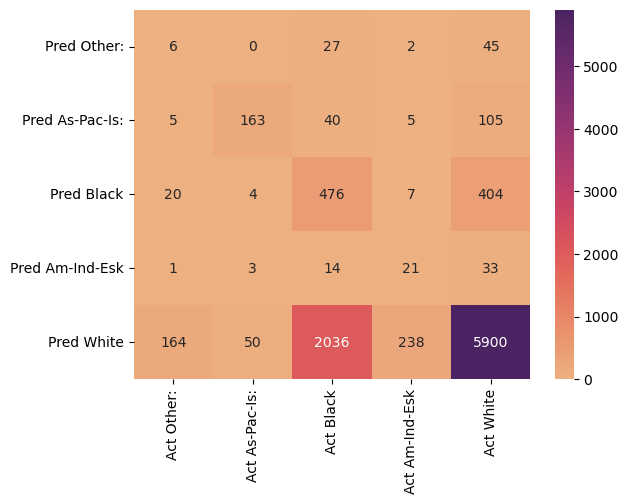

In [1066]:
# Wizualizacja macierzy błędu:
print(df.race.value_counts())
col = ['Other', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'White']
cm_matrix = pd.DataFrame(data=cm_race, columns=['Act Other:', 'Act As-Pac-Is:', 'Act Black', 'Act Am-Ind-Esk', 'Act White'], 
                                 index=['Pred Other:', 'Pred As-Pac-Is:', 'Pred Black', 'Pred Am-Ind-Esk', 'Pred White'])


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='flare')

Wiele błędów klasyfikacji dla tego modelu to predicted_value = 'White', gdy w rzeczywistości był to 'Black'.

## NATIVE_COUNTRY:

In [1067]:
# zmienna niezależna - native_country:
X_nc = df.drop(['native_country'], axis = 1)
y_nc = df['native_country']

print(X_nc)
print(y_nc)

# Stworzenie zbiorów uczących i testowych:
X_nc_train, X_nc_test, y_nc_train, y_nc_test = train_test_split(X_nc, y_nc, test_size=0.3, random_state=0)
X_nc_train.shape, X_nc_test.shape

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

((22792, 14), (9769, 14))

In [1068]:
# Feature engineering:
print(str_cols_names)
# drop 'native_country'
col_no_nc = str_cols_names.delete(7)

print(col_no_nc.to_numpy())
print(num_cols_names.to_numpy())

# wypisuje procent brakujących wartości w zmiennych tekst. w X_train
print(X_nc_train[col_no_nc].isnull().mean()) 

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
['workclass' 'education' 'marital_status' 'occupation' 'relationship'
 'race' 'sex' 'income']
['age' 'fnlwgt' 'education_num' 'capital_gain' 'capital_loss'
 'hours_per_week']
workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
income            0.000000
dtype: float64


In [1069]:
for col in col_no_nc:
    if X_nc_train[col].isnull().mean()>0:
        print(col, (X_nc_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607


In [1070]:
for df4 in [X_nc_train, X_nc_test]:
    df4['workclass'].fillna(X_nc_train['workclass'].mode()[0], inplace=True)
    df4['occupation'].fillna(X_nc_train['occupation'].mode()[0], inplace=True)
    # df4['native_country'].fillna(X_nc_train['native_country'].mode()[0], inplace=True)

In [1071]:
print(X_nc_train[col_no_nc].isnull().sum(), '\n')
print(X_nc_test[col_no_nc].isnull().sum())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
income            0
dtype: int64 

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
income            0
dtype: int64


In [1072]:
# print(X_nc_train.isnull().sum(),'\n')
# print(X_nc_test.isnull().sum())
print(y_nc_train.isnull().sum())
print(y_nc_test.isnull().sum())

414
169


In [1073]:
# zamieniamy NaN'y z Native_country na najczęstsze wart. z tej kolumny:
y_nc_test.fillna(y_nc.mode()[0], inplace=True)
y_nc_train.fillna(y_nc.mode()[0], inplace=True)

print(y_nc_train.isnull().sum())
print(y_nc_test.isnull().sum())

0
0


In [1074]:
encoder = ce.OneHotEncoder(cols=col_no_nc)

X_nc_train = encoder.fit_transform(X_nc_train)
X_nc_test = encoder.transform(X_nc_test)

# print(X_nc_train.head(3))
X_nc_test.head(3)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,1,0,0,44,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,1,0,0,40,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,1,0,0,0,40,0,1


In [1075]:
# Następnie feature scaling:
cols = X_nc_train.columns

scaler = RobustScaler()

X_nc_train = scaler.fit_transform(X_nc_train)

X_nc_test = scaler.transform(X_nc_test)
X_nc_train = pd.DataFrame(X_nc_train, columns=[cols])
X_nc_test = pd.DataFrame(X_nc_test, columns=[cols])

# X_nc_train.head()
X_nc_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006571,...,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.8,0.0,0.0
1,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323136,...,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.253496,...,0.0,1.0,0.0,0.0,0.0,0.0,1902.0,0.0,0.0,0.0
4,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042564,...,0.0,0.0,0.0,0.0,0.0,0.0,2824.0,7.2,1.0,-1.0


In [1076]:
# y_nc_train.replace(np.NaN, value = , inplace = True)

In [1077]:
# stworzenie i trening modelu
gnb_nc = GaussianNB()


# fit the model
gnb_nc.fit(X_nc_train, y_nc_train)

y_cn_pred = gnb_nc.predict(X_nc_test)

y_cn_pred

/Users/piotrsuchy/Desktop/Programming/anaconda/anaconda3/envs/piotrsuchy/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/piotrsuchy/Desktop/Programming/anaconda/anaconda3/envs/piotrsuchy/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([' Outlying-US(Guam-USVI-etc)', ' Outlying-US(Guam-USVI-etc)',
       ' Yugoslavia', ..., ' Japan', ' Yugoslavia', ' Scotland'],
      dtype='<U27')

In [1078]:
# Ocena dokładności modelu i wyliczenie macierzy błędu:

print('Dokładność modelu to: {0:0.5f}'.format(accuracy_score(y_nc_test, y_cn_pred)),'\n')

cm_cn = confusion_matrix(y_nc_test, y_cn_pred)

print('Macierz Błędu: \n\n', cm_cn)

Dokładność modelu to: 0.00870 

Macierz Błędu: 

 [[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0   16]
 [   0    0    0 ...    0    0    0]
 ...
 [   3    1    0 ...   65    1 2752]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]]


 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:>

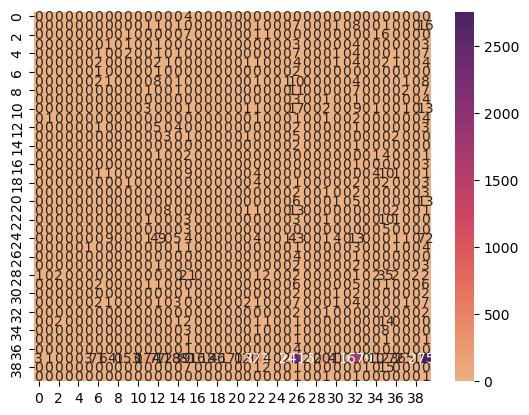

In [1079]:
# Wizualizacja macierzy błędu:
print(df.native_country.value_counts())
# col = ['Other', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'White']
cm_matrix = pd.DataFrame(data=cm_cn)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='flare')

## Wnioski:

Dla modelu klasyfikacji binarnej model był najdokładniejszy. Ponieważ income był rozłożony na dwie kategorie: > lub <, model zadziałał lepiej - dokładność była wyższa, a wyczytanie informacji z macierzy błędu i jej wizualizacja - trywialne. 

Dla modelu klasyfikacji 5-ciu klas - ras, model nadal był dość dobry, z dokładnością prawie 70%, a Confusion Matrix można było z pewnymi trudnościami dobrze przedstawić.

Lecz w ostatnim przypadku, gdy zmienną y było 'native_country' model był całkowicie nieskuteczny. Z reszty danych nie byliśmy w stanie ustalić pochodzenia osoby. Głównym problemem było ponad 40 klas. Taka liczba to zdecydowanie zbyt dużo dla tak małej ilości danych.